# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_count = study_data_complete['Mouse ID'].nunique()
print(unique_mice_count)

249


obtaining the DataFrame where the combination of Mouse ID and Timepoint is not unique

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [9]:
#the unique Mouse IDs that are duplicated
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = study_data_complete.loc[study_data_complete['Mouse ID'] == 'g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_data_complete.drop(duplicate_data.index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = clean_df['Mouse ID'].nunique()
unique_mice_count_clean

248

## Summary Statistics

In [16]:
import numpy as np

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sd_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [20]:
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = pd.DataFrame({'Mean Tumor Volume':mean_tumor_volume, 'Median Tumor Volume':median_tumor_volume,
                                     'Tumor Volume Variance':variance_tumor_volume,
                                     'Tumor Volume Std. Dev.':sd_tumor_volume,
                                     'Tumor Volume Std. Err.':sem_tumor_volume})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).rename_axis()
tumor_volume_agg

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [57]:
# Group by drug regimen and count the number of rows
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
drug_regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

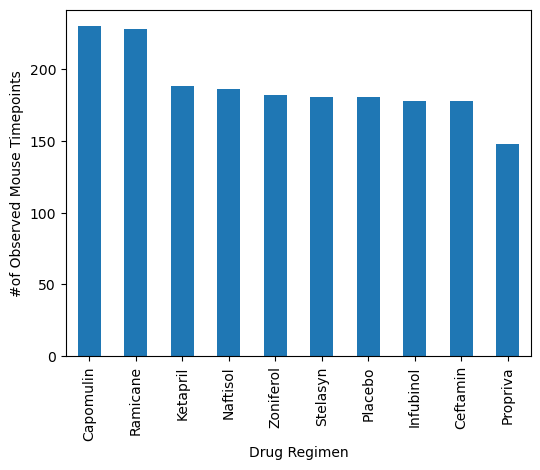

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts.plot(kind='bar', figsize=(6, 4.5),
                         xlabel='Drug Regimen', ylabel='#of Observed Mouse Timepoints')
plt.show

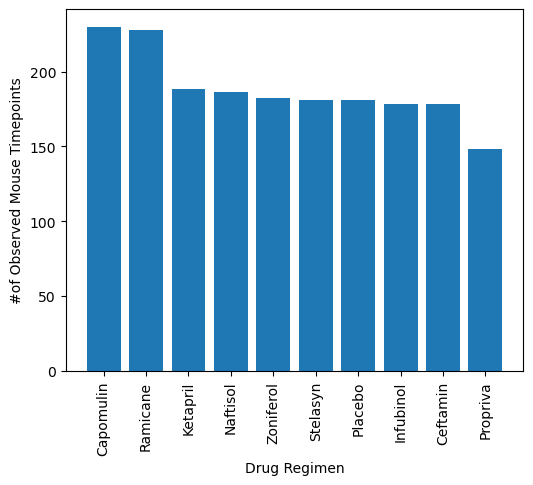

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(5.9, 4.7))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('#of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

In [75]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
gender_counts

Sex
Male      125
Female    123
Name: count, dtype: int64

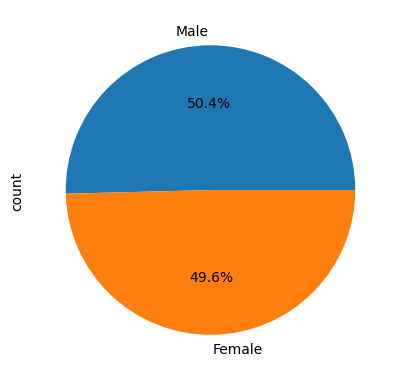

In [86]:
# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(4.7, 4.7))
plt.show()

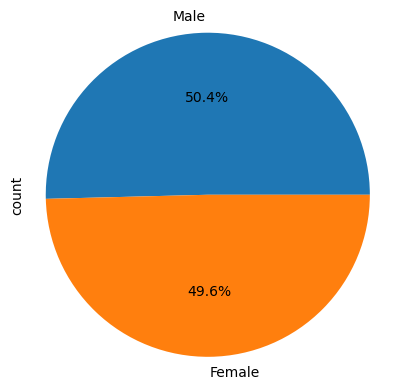

In [94]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.figure(figsize=(4.6, 4.6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.ylabel('count')
plt.axis('equal')  # to ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoints.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [123]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumore_volume = pd.merge(last_timepoints, clean_df, on=['Mouse ID', 'Timepoint'])
merged_tumore_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [124]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [125]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

In [126]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_tumore_volume[merged_tumore_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(treatment_data)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print out the results
    print(f"{treatment} potential outliers:")
    print(outliers)

Capomulin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11568\145709173.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor': 'red', 'marker': 'o', 'markersize': '12', 'linestyle': 'none'})


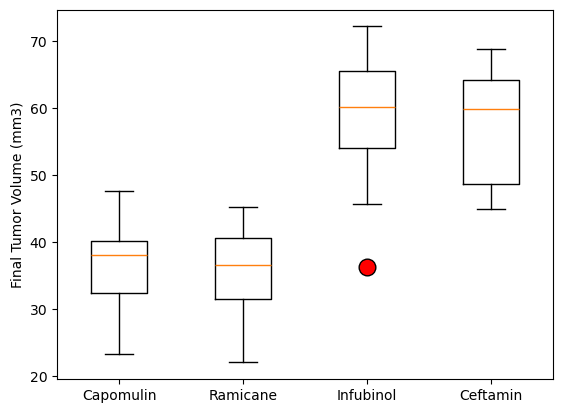

In [127]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create a box plot
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor': 'red', 'marker': 'o', 'markersize': '12', 'linestyle': 'none'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [128]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatement = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_treatement

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [129]:
# Selecting the mouse 'l509'
mouse_l509 = capomulin_treatement[capomulin_treatement['Mouse ID'] == 'l509']
mouse_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


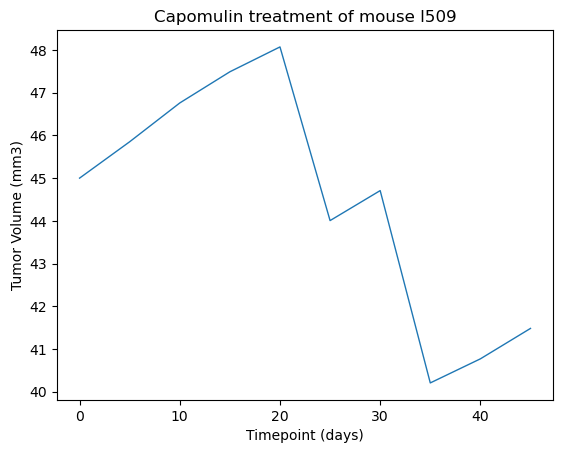

In [130]:
# Plot tumor volume vs timepoint for the mouse l509
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], linewidth=1)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [132]:
#obtaining average tumor volume for each mouse in capomulin_treatement data frame
avg_tumor_volume = capomulin_treatement.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_tumor_volume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [134]:
#obtaining average mouse weight in capomulin_treatement data frame
mouse_weight = capomulin_treatement.groupby('Mouse ID')['Weight (g)'].mean()
mouse_weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

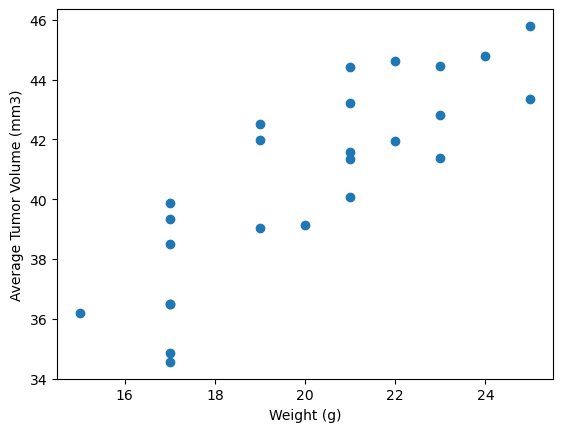

In [135]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [136]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient[0]:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


In [138]:
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_volume)

In [140]:
#setting values for the regression line
regress_values = mouse_weight * slope + intercept

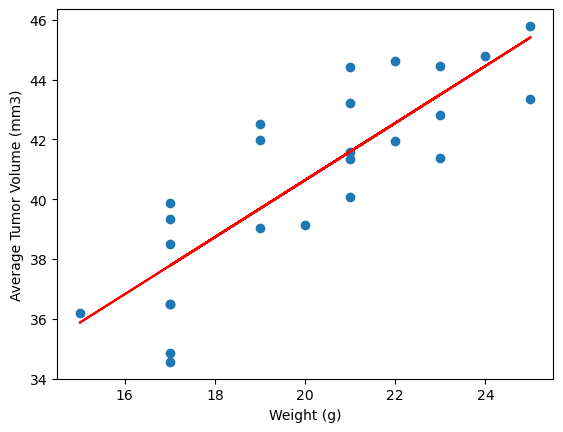

In [142]:
# plotting scatter plot and the linear regression line
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, regress_values, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()